# Pay Equity Analisys 

## Importing Data

Please note that the dataset below is artificial and is not based on any real organization, even though it was created to reflect the same types of columns we would find in a roster from an organization.

In [96]:
import pandas

In [97]:
df = pandas.read_csv("dummy data.csv")

In [98]:
df['Salary'].sum()

2904141095.0682545

In [99]:
df.head()

,Gender,Tenure,Job Family,State,Salary,Race,Performance rating
0,Female,12,Engineering,CA,44301.47660,Black,5
1,Male,2,Engineering,CA,78632.46920,White,3
2,Female,17,Engineering,TX,79379.20000,White,2
3,Female,25,Legal,CA,87761.08000,White,2
4,Male,6,Engineering,TX,48013.70233,White,4


In [165]:
from matplotlib import pyplot

<BarContainer object of 46719 artists>

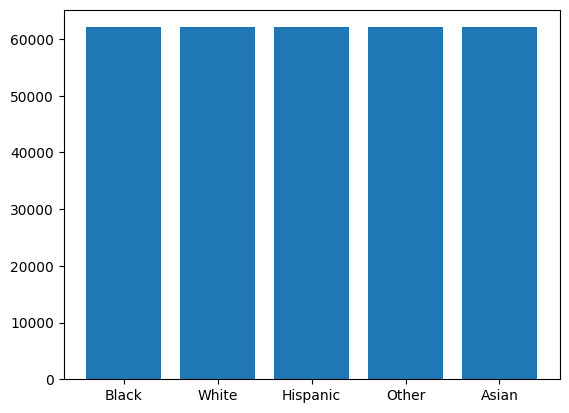

In [169]:
pyplot.bar(x=df['Race'],height=df['Salary'].median())

<BarContainer object of 46719 artists>

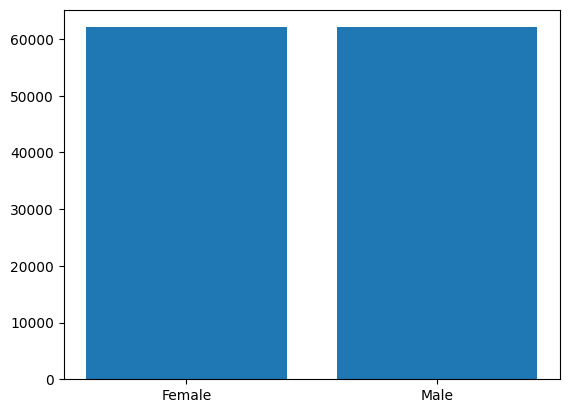

In [170]:
pyplot.bar(x=df['Gender'],height=df['Salary'].median())

## Calculating some statistics

In [100]:
def median_by_demographics(thedataframe, dem):
    demographic = thedataframe[dem].unique()
    print('Median Salaries by',dem)
    for thisDem in demographic:
        tempdf = thedataframe[thedataframe[dem]==thisDem]
        print(thisDem, ':', tempdf['Salary'].median())

In [101]:
median_by_demographics(df,'Race')

Median Salaries by Race
Black : 56890.847255
White : 62924.3433
Hispanic : 61801.79
Other : 61834.0275
Asian : 62551.73


In [168]:
median_by_demographics(df,'Gender')

Median Salaries by Gender
Female : 60051.85
Male : 63116.4353


In this case, looking at the medians, it looks like Males are being paid more than Females and Whites are making a little more than the rest of the races, especially blacks.

## Checking to see if the differences are statistically significant

### Males vs Females

In [103]:
median_salary = df['Salary'].median()
percMales = len(df[df['Gender']=='Male'])/len(df)
percFemales = len(df[df['Gender']=='Female'])/len(df)
TotalHC = len(df)
le_median = len(df[df['Salary'] <= median_salary])
gt_median = len(df[df['Salary'] > median_salary])
exp_F_le_median = percFemales * le_median
exp_F_gt_median = percFemales * gt_median
exp_M_le_median = percMales * le_median
exp_M_gt_median = percMales * gt_median
obs_F_le_median = len(df[(df['Gender']=='Female') & (df['Salary'] <= median_salary)])
obs_F_gt_median = len(df[(df['Gender']=='Female') & (df['Salary'] > median_salary)])
obs_M_le_median = len(df[(df['Gender']=='Male') & (df['Salary'] <= median_salary)])
obs_M_gt_median = len(df[(df['Gender']=='Male') & (df['Salary'] > median_salary)])
print('Percent Males:',percMales)
print('Percent Females:',percFemales)
print('Total number of employees:', TotalHC)
print('Number of employees less than or equal to median:', le_median)
print('Number of employees greater than median:', gt_median)
print('Expected number of females less than or equal to median:', exp_F_le_median)
print('Observed number of females less than or equal to median:', obs_F_le_median)
print('Expected number of females greater than median:',exp_F_gt_median)
print('Observed number of females greater than median:',obs_F_gt_median)
print('Expected number of Males less than or equal to median:', exp_M_le_median)
print('Observed number of Males less than or equal to median:', obs_M_le_median)
print('Expected number of Males greater than median:',exp_M_gt_median)
print('Observed number of Males greater than median:',obs_M_gt_median)

Percent Males: 0.6672231854277703
Percent Females: 0.33277681457222974
Total number of employees: 46719
Number of employees less than or equal to median: 23360
Number of employees greater than median: 23359
Expected number of females less than or equal to median: 7773.666388407287
Observed number of females less than or equal to median: 8598
Expected number of females greater than median: 7773.333611592714
Observed number of females greater than median: 6949
Expected number of Males less than or equal to median: 15586.333611592714
Observed number of Males less than or equal to median: 14762
Expected number of Males greater than median: 15585.666388407286
Observed number of Males greater than median: 16410


In [104]:
import scipy

In [105]:
expected = [exp_F_le_median,exp_F_gt_median,exp_M_le_median,exp_M_gt_median]
observed = [obs_F_le_median,obs_F_gt_median,obs_M_le_median,obs_M_gt_median]
scipy.stats.chisquare(f_obs=observed,f_exp=expected)

Power_divergenceResult(statistic=262.028348856098, pvalue=1.6369267442434444e-56)

With a pvalue of basically 0%, we can say there is compensation discrimination against females in this fictitious organization, and that it is statistically significant.

### Whites vs other races

In [106]:
import numpy

In [107]:
df['Position'] = numpy.where(df['Salary'] > median_salary,'Greater than Median','Below or at median')


In [108]:
df.head()

,Gender,Tenure,Job Family,State,Salary,Race,Performance rating,Position
0,Female,12,Engineering,CA,44301.47660,Black,5,Below or at median
1,Male,2,Engineering,CA,78632.46920,White,3,Greater than Median
2,Female,17,Engineering,TX,79379.20000,White,2,Greater than Median
3,Female,25,Legal,CA,87761.08000,White,2,Greater than Median
4,Male,6,Engineering,TX,48013.70233,White,4,Below or at median


In [109]:
races_observed = pandas.pivot_table(df,index='Position',values='Gender',aggfunc='count',columns='Race').to_numpy()

In [110]:
races_observed

array([[ 2305,  2950,  2310,  2331, 13464],
       [ 2440,  1676,  2252,  2278, 14713]], dtype=int64)

In [111]:
expecteddf = pandas.pivot_table(df,index='Position',values='Gender',aggfunc='count',columns='Race')

In [112]:
races_expected_below = []
races_expected_above = []
for race in expecteddf.columns:
    races_expected_below.append((len(df[df['Race']==race])/len(df))*le_median)
    races_expected_above.append((len(df[df['Race']==race])/len(df))*gt_median)    

In [113]:
races_expected_list = [races_expected_below,races_expected_above]

In [114]:
scipy.stats.chisquare(f_obs=races_observed,f_exp=races_expected_list,axis=None)

Power_divergenceResult(statistic=411.41154910756296, pvalue=5.0263390197107356e-83)

Again, with a low P-value, we can say that the differences in salaries among races are statistically significant.

With both issues being statistically significant, an investigator would ask the employer for explanations about why males are being better paid than females and why whites are being paid more than the other races. If the employer presents more information, the investigator can perform more sophisticated statistical analysis.

## Regression analysis to determine if tenure and performance would help us explain the gaps

In [115]:
import statsmodels.api as sm

# Creating a new DataFrame with relevant columns
df_regression = df[['Performance rating', 'Tenure', 'Gender', 'Salary']].dropna()

# Encoding categorical variables
df_regression['Gender'] = df_regression['Gender'].astype('category').cat.codes

# Defining the independent variables (X) and the dependent variable (y)
X = df_regression[['Performance rating', 'Tenure', 'Gender']]
y = df_regression['Salary']

# Adding a constant to the independent variables matrix (for the intercept term)
X = sm.add_constant(X)

# Performing the regression
model = sm.OLS(y, X).fit()

# Printing the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     143.1
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.53e-92
Time:                        23:36:54   Log-Likelihood:            -5.1813e+05
No. Observations:               46719   AIC:                         1.036e+06
Df Residuals:                   46715   BIC:                         1.036e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.024e+04    240

With these results, we can see that both performance rating and tenure have a high p-value number and gender has a p value of 0. This means that Gender is statistically significant to determine pay, while performance rating and tenure are not.

This shows that this organization would not be able to explain its pay discrepancy with tenure or performance rating, and therefore we would need to look for other suitable explanations or an investigator would find cause in a complaint and we would be in trouble.

The recommended course of action here is to fix the pay discrepancies before a complaint is filed.

In [116]:
# Creating a new DataFrame with relevant columns
df_regression_race = df[['Performance rating', 'Tenure', 'Race', 'Salary']].dropna()

# Encoding categorical variables
df_regression_race['Race'] = df_regression_race['Race'].astype('category').cat.codes

# Defining the independent variables (X) and the dependent variable (y)
X_race = df_regression_race[['Performance rating', 'Tenure', 'Race']]
y_race = df_regression_race['Salary']

# Adding a constant to the independent variables matrix (for the intercept term)
X_race = sm.add_constant(X_race)

# Performing the regression
model_race = sm.OLS(y_race, X_race).fit()

# Printing the summary of the regression results
print(model_race.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     70.71
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.28e-45
Time:                        23:36:54   Log-Likelihood:            -5.1824e+05
No. Observations:               46719   AIC:                         1.036e+06
Df Residuals:                   46715   BIC:                         1.037e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.013e+04    267

Again, differences by race are statistically significant and tenure and performance rating are not able to justify the differences in pay by different races.

## Fixing pay discrepancies: determining required budget and populations to receive

In [117]:
# Retrieve the gender coefficient from the regression model
gender_coefficient = model.params['Gender']
print('Gender coefficient:',gender_coefficient)

total_adjustment_cost = percFemales * TotalHC * gender_coefficient

print(f"Total adjustment cost to ensure pay equity (males vs females): ${total_adjustment_cost:.2f}")
total_cost_percentage_payroll = total_adjustment_cost/df['Salary'].sum()*100

print(f'Total adjustment cost as a percentage of total payroll cost: {total_cost_percentage_payroll:.2f}%')

Gender coefficient: 3222.1302911872363
Total adjustment cost to ensure pay equity (males vs females): $50094459.64
Total adjustment cost as a percentage of total payroll cost: 1.72%


In this case, we would suggest applying a $50M total increase for females in the organization, which means 1.7% of the payroll. This could mean giving each female a $3k increase, or distribute this among the population looking at performance ratings, tenure, compa-ratio, etc and then running the model again. For simplicity in this case, I'm going to take a peanut butter spread approach.

In [118]:
df_adj = df.copy()
df_adj['Salary'] = numpy.where(df_adj['Gender']=='Female',df_adj['Salary']+gender_coefficient,df_adj['Salary'])

In [119]:
median_by_demographics(df_adj,'Gender')

Median Salaries by Gender
Female : 63273.98029118723
Male : 63116.4353


In [120]:
median_salary = df_adj['Salary'].median()
percMales = len(df_adj[df_adj['Gender']=='Male'])/len(df_adj)
percFemales = len(df_adj[df_adj['Gender']=='Female'])/len(df_adj)
TotalHC = len(df_adj)
le_median = len(df_adj[df_adj['Salary'] <= median_salary])
gt_median = len(df_adj[df_adj['Salary'] > median_salary])
exp_F_le_median = percFemales * le_median
exp_F_gt_median = percFemales * gt_median
exp_M_le_median = percMales * le_median
exp_M_gt_median = percMales * gt_median
obs_F_le_median = len(df_adj[(df_adj['Gender']=='Female') & (df_adj['Salary'] <= median_salary)])
obs_F_gt_median = len(df_adj[(df_adj['Gender']=='Female') & (df_adj['Salary'] > median_salary)])
obs_M_le_median = len(df_adj[(df_adj['Gender']=='Male') & (df_adj['Salary'] <= median_salary)])
obs_M_gt_median = len(df_adj[(df_adj['Gender']=='Male') & (df_adj['Salary'] > median_salary)])
expected = [exp_F_le_median,exp_F_gt_median,exp_M_le_median,exp_M_gt_median]
observed = [obs_F_le_median,obs_F_gt_median,obs_M_le_median,obs_M_gt_median]
scipy.stats.chisquare(f_obs=observed,f_exp=expected)

Power_divergenceResult(statistic=0.6067189838278131, pvalue=0.8948925076128004)

Now we see that the median for Females is $200 higher than Males, but the new p_value for the chi-square test is now almost 90%, which means the difference is not statistically significant. There's no need to run another regression to look at the coefficients.

In [121]:
df_adj['Position'] = numpy.where(df_adj['Salary'] > median_salary,'Greater than Median','Below or at median')
races_observed = pandas.pivot_table(df_adj,index='Position',values='Gender',aggfunc='count',columns='Race').to_numpy()
expecteddf = pandas.pivot_table(df_adj,index='Position',values='Gender',aggfunc='count',columns='Race')
races_expected_below = []
races_expected_above = []
for race in expecteddf.columns:
    races_expected_below.append((len(df_adj[df_adj['Race']==race])/len(df_adj))*le_median)
    races_expected_above.append((len(df_adj[df_adj['Race']==race])/len(df_adj))*gt_median)    

races_expected_list = [races_expected_below,races_expected_above]
scipy.stats.chisquare(f_obs=races_observed,f_exp=races_expected_list,axis=None)

Power_divergenceResult(statistic=415.96969165204933, pvalue=5.3472486484965875e-84)

After adjusting for Females, the race issue remains. Running the regression again to get the coefficient for race

In [122]:
# Creating a new DataFrame with relevant columns
df_adj_regression_race = df_adj[['Performance rating', 'Tenure', 'Race', 'Salary']].dropna()

# Encoding categorical variables
df_adj_regression_race['Race'] = df_adj_regression_race['Race'].astype('category').cat.codes

# Defining the independent variables (X) and the dependent variable (y)
X_race = df_adj_regression_race[['Performance rating', 'Tenure', 'Race']]
y_race = df_adj_regression_race['Salary']

# Adding a constant to the independent variables matrix (for the intercept term)
X_race = sm.add_constant(X_race)

# Performing the regression
model_race = sm.OLS(y_race, X_race).fit()

# Printing the summary of the regression results
print(model_race.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     71.88
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.23e-46
Time:                        23:36:54   Log-Likelihood:            -5.1802e+05
No. Observations:               46719   AIC:                         1.036e+06
Df Residuals:                   46715   BIC:                         1.036e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                6.12e+04    266

In [123]:
# Retrieve the race coefficient from the regression model
Race_coefficient = model_race.params['Race']
print('Race coefficient:',Race_coefficient)

total_adjustment_cost = len(df[df['Race']!='White']) * Race_coefficient

print(f"Total adjustment cost to ensure pay equity (non-whites vs whites): ${total_adjustment_cost:.2f}")
total_cost_percentage_payroll = total_adjustment_cost/df['Salary'].sum()*100

print(f'Total adjustment cost as a percentage of total payroll cost: {total_cost_percentage_payroll:.2f}%')

Race coefficient: 755.8671841039402
Total adjustment cost to ensure pay equity (non-whites vs whites): $14015289.33
Total adjustment cost as a percentage of total payroll cost: 0.48%


In [124]:
df_readj = df_adj.copy()
print()
df_readj['Salary'] = numpy.where(df_readj['Race']!='White',df_readj['Salary']+Race_coefficient,df_readj['Salary'])

median_by_demographics(df_readj,'Race')

median_salary = df_readj['Salary'].median()
le_median = len(df_readj[df_readj['Salary'] <= median_salary])
gt_median = len(df_readj[df_readj['Salary'] > median_salary])

df_readj['Position'] = numpy.where(df_readj['Salary'] > median_salary,'Greater than Median','Below or at median')
races_observed = pandas.pivot_table(df_readj,index='Position',values='Gender',aggfunc='count',columns='Race').to_numpy()
expecteddf = pandas.pivot_table(df_readj,index='Position',values='Gender',aggfunc='count',columns='Race')
races_expected_below = []
races_expected_above = []
for race in expecteddf.columns:
    races_expected_below.append((len(df_readj[df_readj['Race']==race])/len(df_readj))*le_median)
    races_expected_above.append((len(df_readj[df_readj['Race']==race])/len(df_readj))*gt_median)    

races_expected_list = [races_expected_below,races_expected_above]
scipy.stats.chisquare(f_obs=races_observed,f_exp=races_expected_list,axis=None)


Median Salaries by Race
Black : 58563.37908410394
White : 64033.34
Hispanic : 63660.522079697555
Other : 63816.57458410394
Asian : 64437.11598410394


Power_divergenceResult(statistic=324.19325152153823, pvalue=1.9068429392793475e-64)

In [125]:
# Creating a new DataFrame with relevant columns
df_readj_regression_race = df_readj[['Performance rating', 'Tenure', 'Race', 'Salary']].dropna()

# Encoding categorical variables
df_readj_regression_race['Race'] = df_readj_regression_race['Race'].astype('category').cat.codes

# Defining the independent variables (X) and the dependent variable (y)
X_race = df_readj_regression_race[['Performance rating', 'Tenure', 'Race']]
y_race = df_readj_regression_race['Salary']

# Adding a constant to the independent variables matrix (for the intercept term)
X_race = sm.add_constant(X_race)

# Performing the regression
model_race = sm.OLS(y_race, X_race).fit()

# Printing the summary of the regression results
print(model_race.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.56
Date:                Fri, 24 May 2024   Prob (F-statistic):           6.00e-23
Time:                        23:36:54   Log-Likelihood:            -5.1801e+05
No. Observations:               46719   AIC:                         1.036e+06
Df Residuals:                   46715   BIC:                         1.036e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.218e+04    266

The problem persists, but only for blacks now. At least the coefficient is much lower, with only $303. Applying this to the black population: 

In [126]:
# Retrieve the race coefficient from the regression model
Race_coefficient = model_race.params['Race']
print('Race coefficient:',Race_coefficient)

total_adjustment_cost = len(df[df['Race']=='Black']) * Race_coefficient

print(f"Total adjustment cost to ensure pay equity (Blacks vs non-Blacks): ${total_adjustment_cost:.2f}")
total_cost_percentage_payroll = total_adjustment_cost/df['Salary'].sum()*100

print(f'Total adjustment cost as a percentage of total payroll cost: {total_cost_percentage_payroll:.2f}%')

Race coefficient: 529.7877658319272
Total adjustment cost to ensure pay equity (Blacks vs non-Blacks): $2450798.20
Total adjustment cost as a percentage of total payroll cost: 0.08%


In [152]:
df_readj2 = df_readj.copy()

df_readj2['Salary'] = numpy.where(df_readj2['Race']=='Black',df_readj2['Salary']+Race_coefficient*8.5,df_readj2['Salary'])


median_salary = df_readj2['Salary'].median()
le_median = len(df_readj2[df_readj2['Salary'] <= median_salary])
gt_median = len(df_readj2[df_readj2['Salary'] > median_salary])

median_by_demographics(df_readj2,'Race')

df_readj2['Position'] = numpy.where(df_readj2['Salary'] > median_salary,'Greater than Median','Below or at median')
races_observed = pandas.pivot_table(df_readj2,index='Position',values='Gender',aggfunc='count',columns='Race').to_numpy()
expecteddf = pandas.pivot_table(df_readj2,index='Position',values='Gender',aggfunc='count',columns='Race')
races_expected_below = []
races_expected_above = []
for race in expecteddf.columns:
    races_expected_below.append((len(df_readj2[df_readj2['Race']==race])/len(df_readj2))*le_median)
    races_expected_above.append((len(df_readj2[df_readj2['Race']==race])/len(df_readj2))*gt_median)    

races_expected_list = [races_expected_below,races_expected_above]
scipy.stats.chisquare(f_obs=races_observed,f_exp=races_expected_list,axis=None)
print('\n')
median_by_demographics(df_readj2,'Gender')

Median Salaries by Race
Black : 63066.57509367532
White : 64033.34
Hispanic : 63660.522079697555
Other : 63816.57458410394
Asian : 64437.11598410394


Median Salaries by Gender
Female : 63996.250291187236
Male : 63871.48328410394


In [147]:
total_budget_perc = (df_readj2['Salary'].sum() - df['Salary'].sum())/df['Salary'].sum()*100

In [149]:
print(f'Total budget as percent of current payroll: {total_budget_perc:.2f}%')

Total budget as percent of current payroll: 2.92%


In [154]:
df_increases = df.copy()
df_increases['New Salary'] = df_readj2['Salary']

In [157]:
df_increases = df_increases[['Gender','Race','Salary','New Salary']]

In [158]:
df_increases['Inc Percentage'] = df_increases['New Salary']/df_increases['Salary']-1

C:\Users\Jackson_Aquino\AppData\Local\Temp\ipykernel_25316\2745548848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increases['Inc Percentage'] = df_increases['New Salary']/df_increases['Salary']-1


In [161]:
pandas.pivot_table(df_increases,values='Inc Percentage',aggfunc=['mean','count'],index=['Gender','Race'])

mean          count
                Inc Percentage Inc Percentage
Gender Race                                  
Female Asian          0.071411           1546
       Black          0.166834           1554
       Hispanic       0.072620           1528
       Other          0.072367           1524
       White          0.057373           9395
Male   Asian          0.012905           3199
       Black          0.098457           3072
       Hispanic       0.012971           3034
       Other          0.013139           3085
       White          0.000000          18782

In [172]:
resultsSummary = pandas.pivot_table(df_increases,values='Inc Percentage',aggfunc=['mean','count'],index=['Gender','Race']).reset_index()

In [174]:
resultsSummary['Demographics'] = resultsSummary['Gender'] + ' ' + resultsSummary['Race']

In [182]:
resultsSummary.columns

MultiIndex([(      'Gender',               ''),
            (        'Race',               ''),
            (        'mean', 'Inc Percentage'),
            (       'count', 'Inc Percentage'),
            ('Demographics',               '')],
           )

<BarContainer object of 10 artists>

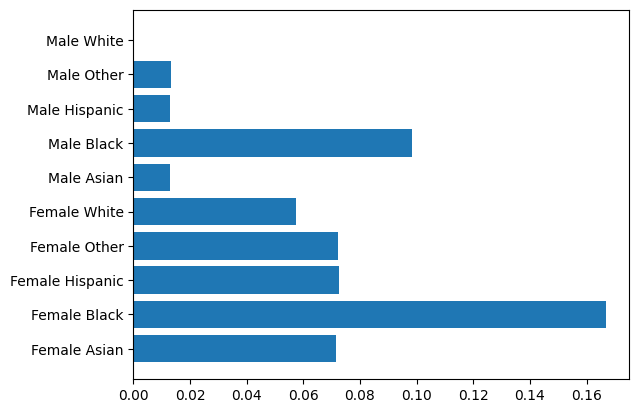

In [184]:
pyplot.barh(y=resultsSummary['Demographics'],width=resultsSummary[('mean','Inc Percentage')])

## Conclusion

In this case, with 2.9% of the payroll, which is a normal amount for annual budget on salary increases in modern organizations, we would be able to solve all the pay equity issues. However, as this organization has very serious issues with pay equity, white males, who are the majority of the population would get a 0% increase, which is probably not realistic and could trigger complaints about reverse discrimination. In this case, we could take a phased approach and solve half of the problem this year and then the other half on the next year, or go to senior management with a case on how much it would cost if we had litigation cases based on pay discrimination and then try to get extra budget to fix it all this year.